<center><h1>Analyzing Caravaggio Paintings</h1></center>

In [114]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
rc = {'axes.labelsize': 32, 'font.size': 32, 'legend.fontsize': 32.0, 'axes.titlesize': 32, 'figure.figsize':(20,15)}
plt.rcParams.update(**rc)

I was working on a Data Camp course on analyziing time-series and images and came across and exercise to analyze the distribution of pixel values of an image and plot them. So I thought it would be fun and help me understand better if I did it on some images that I liked. So I chose a couple paintings, one black and white and the other color, both by my favorite artist, Michelangelo Merisi da Caravaggio.
<br>
<center><h3>Jesus and the Disciples (1604-1605)</h3></center>

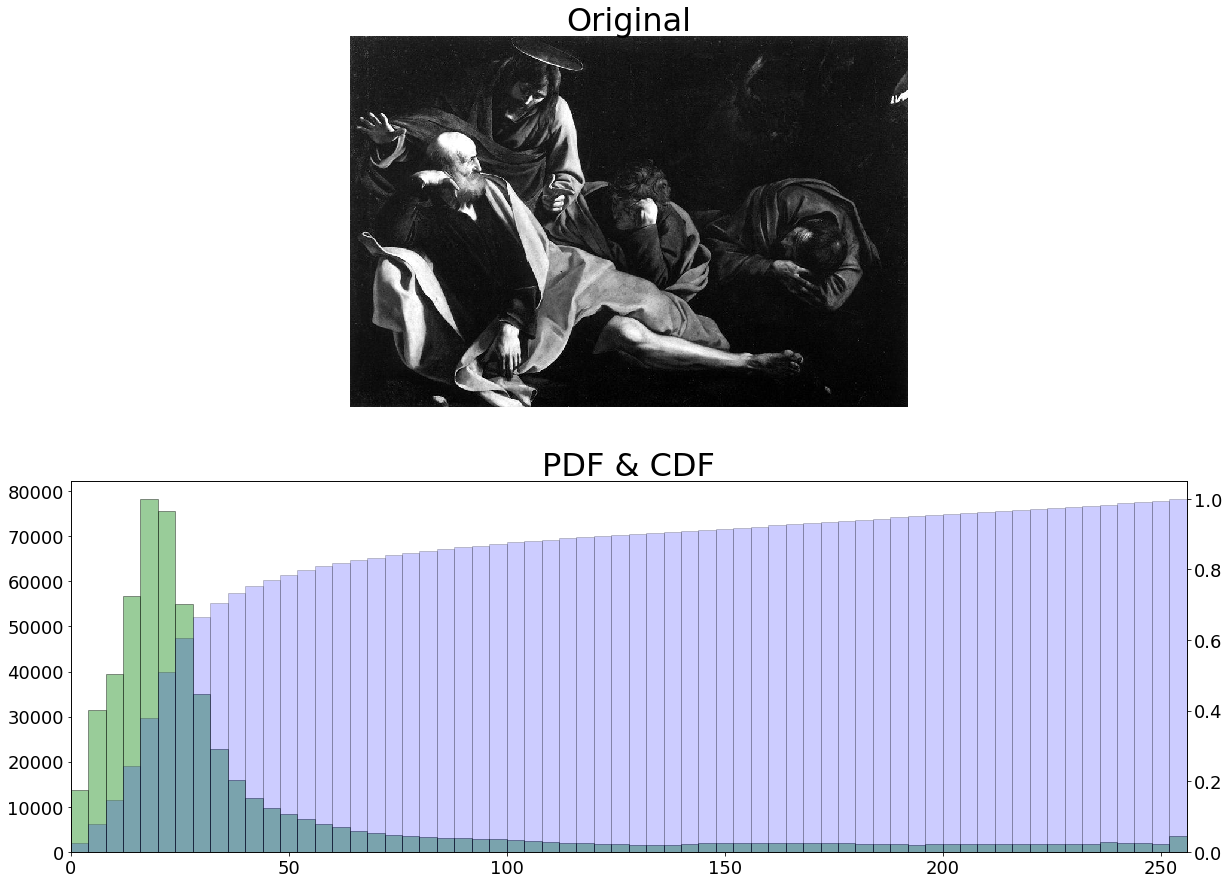

In [119]:
image = plt.imread('caravaggio_painting.jpg')

plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

pixels = image.flatten() # flatten image to 1d

# histogram
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, color='green', alpha=0.4, ec='black')
plt.grid('off')

plt.twinx() # overlay CDF on same graph

# show CDF
cdf = plt.hist(pixels, bins=64, range=(0,256), normed=True, cumulative=True, color='blue', alpha=0.2, ec='black')
               
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF')
plt.show()

We can see that the pixel intensities are highly skewed to the right. Caravaggio was a Baroque-style painter who was known for his very dark paintings so this is normal. A majority of the pixel values have less than a 50 pixel value.
<br>
<br>
Here we can normalize the pixel values to make them equally separated and make the picture lighter. Let us see what happens.

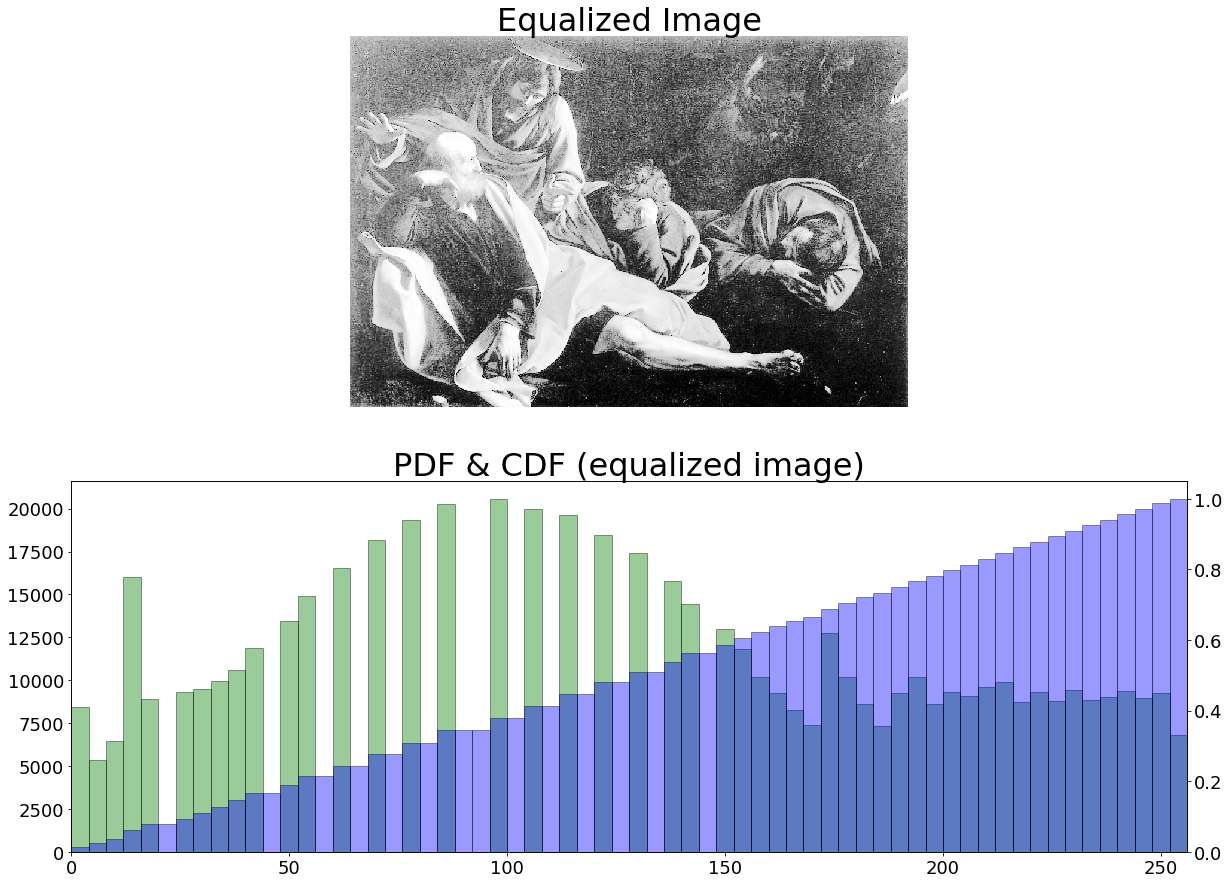

In [116]:
# we can get the cdf, bins, and patches from here
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)
new_image = new_pixels.reshape(image.shape)

plt.subplot(2,1,1)
plt.title('Equalized Image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False, color='green', alpha=0.4, ec='black')
plt.grid('off')

plt.twinx()
plt.xlim((0, 256))
plt.grid('off')
plt.title('PDF & CDF (equalized image)')

cdf = plt.hist(new_pixels, bins=64, range=(0,256), cumulative=True, normed=True, color='blue', alpha=0.4, ec='black')
plt.show()

Now we can see that the pixel values are equally distributed from the CDF. The picture looks worse since it was made to be dark. Now let us try messing with a color image.

<center><h3>The Calling of St. Matthew (1599-1600)</h3></center>

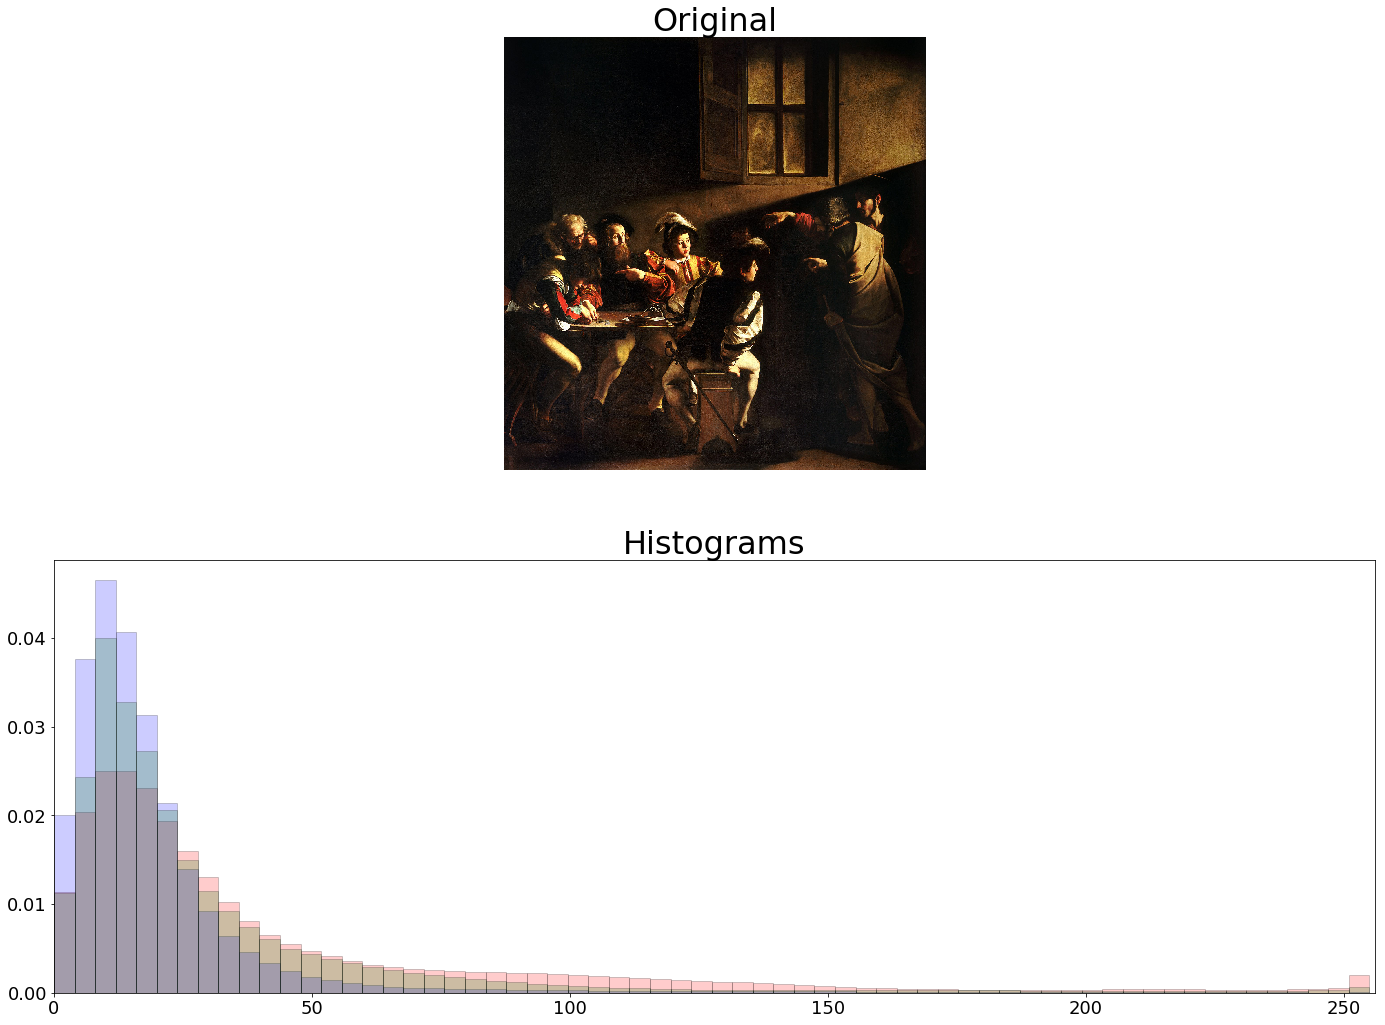

In [117]:
image_color = plt.imread('caravaggio_calling.jpg')

plt.subplot(2,1,1)
plt.title('Original')
plt.axis('off')
plt.imshow(image_color)

# we can extract each color layer: red, green, and blue from the image
red, green, blue = image_color[:,:,0], image_color[:,:,1], image_color[:,:,2]

# flatten them to 1d like before
red_pixels, blue_pixels, green_pixels  = red.flatten(), blue.flatten(), green.flatten()

# plot
plt.subplot(2,1,2)
plt.title('Histograms')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2, ec='black')
plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2, ec='black')
plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2, ec='black')

plt.tight_layout()
plt.show()

It is a little hard to see, so we can try see the distribution between two different colors.

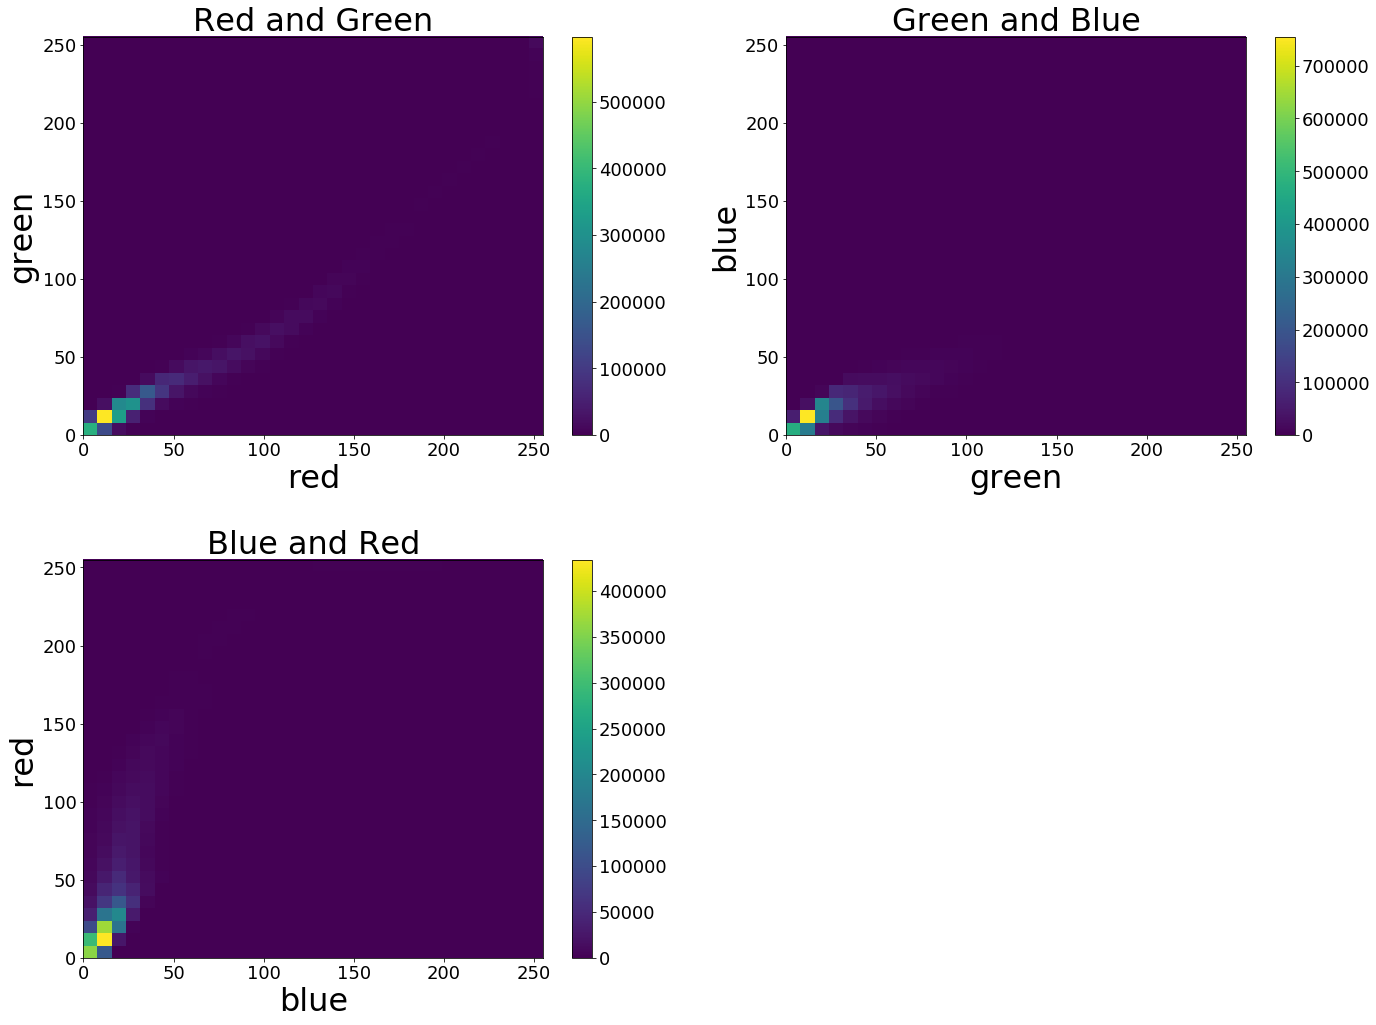

In [118]:
# red and green
plt.subplot(2,2,1)
plt.title('Red and Green')
plt.grid('off') 
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))
plt.colorbar()

# green and blue
plt.subplot(2,2,2)
plt.title('Green and Blue')
plt.grid('off')
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))
plt.colorbar()

# blue and red
plt.subplot(2,2,3)
plt.title('Blue and Red')
plt.grid('off')
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))
plt.colorbar()

plt.tight_layout()
plt.show()

Here we can that most combinations of these colors were under a pixel value of 50.